In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas

In [2]:
from scipy.integrate import ode
df = pandas.read_csv('hudson-bay-linx-hare.csv',header=1)

year = df['Year']
lynx = df['Lynx']
hare = df['Hare']

times = np.array(year,dtype=float)
yobs = np.array([hare,lynx]).T 
yobs_norm = yobs/ yobs.std(axis=0)
#N = len(times)

In [3]:
N = len(year) - 1
ts = np.arange(1,N+1).tolist()
y_init = yobs_norm[0].tolist()
y = yobs_norm[1:].tolist()

In [4]:
lk_data = {
    'N' : N,
    'ts' : ts,
    'y_init' : y_init,
    'y' : y,
    'slab_df' : 4.0,
    'slab_scale' : 2.0,
    'd' : 10,
}

import json
with open('lk_data_real.json', 'w') as json_file:
  json.dump(lk_data, json_file)

In [5]:
pwd

'/home/hirshs/stan'

In [6]:
trace = az.from_cmdstan('cmdstan/examples/lotka_bdf/output.csv')

/home/hirshs/anaconda3/envs/mars-sunode/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

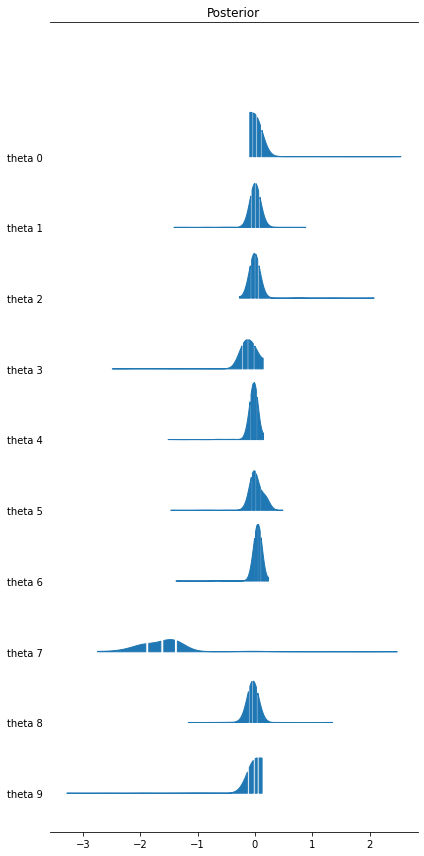

In [7]:
plt.figure()
myplot = az.plot_forest(trace, var_names=['theta'], kind='ridgeplot', combined=True, figsize=(6,12), ridgeplot_quantiles=[.25, .5, .75])[0]
plt.title('Posterior')
plt.tight_layout()
plt.show()

In [9]:
pm.summary(trace, var_names=['theta','tau'])

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shap

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta[0],0.049,0.122,-0.001,0.123,0.062,0.047,4.0,4.0,2.0,24.0,NaN
theta[1],-0.002,0.107,-0.036,0.110,0.009,0.010,130.0,61.0,9.0,26.0,NaN
theta[2],0.015,0.123,-0.012,0.058,0.018,0.013,46.0,46.0,9.0,15.0,NaN
theta[3],-0.138,0.218,-0.214,0.016,0.075,0.055,8.0,8.0,2.0,13.0,NaN
theta[4],-0.030,0.094,-0.082,0.006,0.036,0.027,7.0,7.0,8.0,17.0,NaN
theta[5],0.020,0.119,-0.102,0.184,0.034,0.025,12.0,12.0,8.0,15.0,NaN
theta[6],0.041,0.079,-0.001,0.083,0.043,0.034,3.0,3.0,2.0,22.0,NaN
theta[7],-1.596,0.424,-2.413,-1.350,0.184,0.245,5.0,2.0,2.0,16.0,NaN
theta[8],-0.035,0.075,-0.057,0.004,0.004,0.004,407.0,193.0,10.0,16.0,NaN
theta[9],-0.042,0.208,-0.075,0.019,0.061,0.044,12.0,12.0,3.0,11.0,NaN
